In [3]:
import matplotlib.pyplot as plt

import xgi

### Adding Nodes and Hyperedges
Once you have a hypergraph, you can start adding single nodes and hyperedges using these convenient functions:

In [4]:
hyperedges = [[1, 2, 3], [3, 4], [4, 5, 6, 7]]
H = xgi.Hypergraph(hyperedges)

In [5]:
H.add_node(8)
H.add_edge([7, 8])

### Visualizing Your Hypergraph
Visualization is key to understanding complex data structures. With XGI, you can effortlessly plot your hypergraph using the default drawing setup:

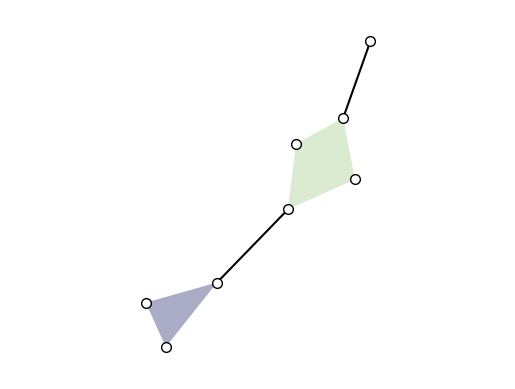

In [ ]:
xgi.draw(H);

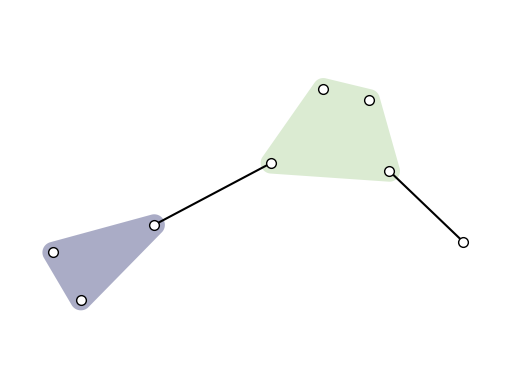

In [7]:
xgi.draw(H, hull=True);

### Exploring Hypergraph Details
XGI provides handy functions to gain insights into your hypergraph. For a quick summary, simply print the hypergraph:

In [8]:
print(H)

Unnamed Hypergraph with 8 nodes and 4 hyperedges


In [9]:
print(H.num_nodes)
print(H.num_edges)

8
4


In [10]:
[{1, 2, 3}, {3, 4}, {4, 5, 6, 7}, {7, 8}, {1, 10}, {8, 9, 10}]

[{1, 2, 3}, {3, 4}, {4, 5, 6, 7}, {7, 8}, {1, 10}, {8, 9, 10}]

### Creating a Random Hypergraph

In [14]:
N = 20
ps = [0.1, 0.01]
H = xgi.random_hypergraph(N, ps, seed=1)

c:\Users\leona\anaconda3\envs\hgx_new\Lib\site-packages\xgi\generators\random.py:152: UserWarning: This method is much slower than fast_random_hypergraph
  warn("This method is much slower than fast_random_hypergraph")


In [15]:
print(H)
print(H.nodes)
print(H.edges.members())

Unnamed Hypergraph with 20 nodes and 34 hyperedges
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[{0, 9}, {0, 10}, {0, 14}, {1, 2}, {1, 3}, {1, 9}, {1, 18}, {3, 6}, {4, 6}, {4, 7}, {12, 5}, {8, 6}, {8, 7}, {19, 7}, {8, 9}, {8, 10}, {8, 16}, {9, 15}, {16, 10}, {17, 10}, {19, 12}, {19, 14}, {17, 15}, {1, 3, 13}, {1, 9, 15}, {1, 19, 14}, {2, 3, 4}, {2, 4, 6}, {16, 17, 4}, {8, 18, 6}, {8, 9, 7}, {8, 11, 19}, {8, 19, 14}, {16, 10, 18}]


### Plotting a random hypergraph

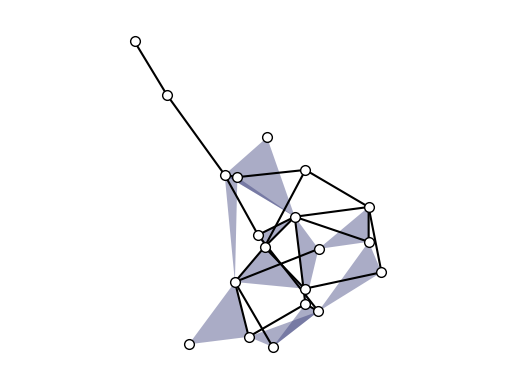

In [16]:
pos = xgi.barycenter_spring_layout(H, seed=1)
xgi.draw(H, pos=pos);

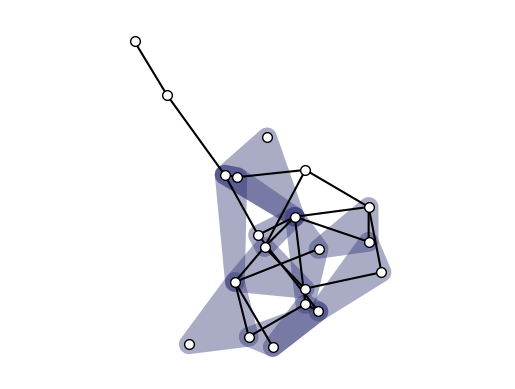

In [17]:
xgi.draw(H, pos=pos, hull=True);

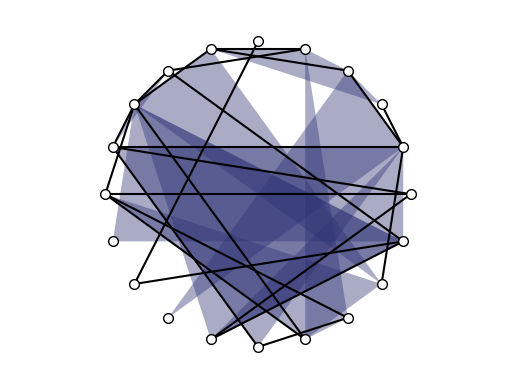

In [18]:
pos_circular = xgi.circular_layout(H)
xgi.draw(H, pos=pos_circular);

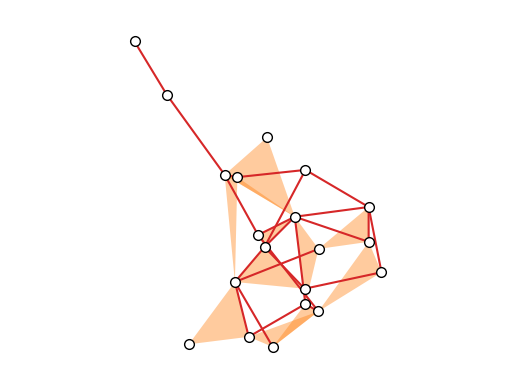

In [19]:
xgi.draw(H, dyad_color="tab:red", edge_fc="tab:orange", pos=pos);

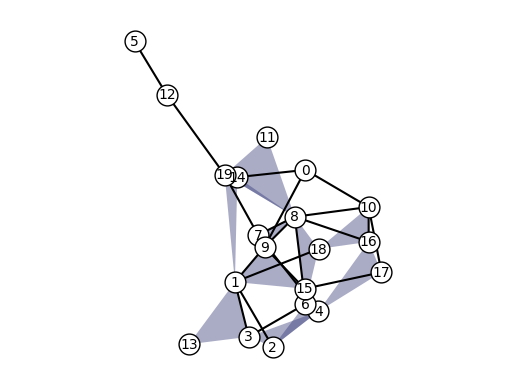

In [20]:
xgi.draw(H, node_labels=True, pos=pos, node_size=15);

### Accessing the maximum order of your hypergraph

In [21]:
xgi.max_edge_order(H)

2

In [22]:
xgi.unique_edge_sizes(H)

[2, 3]

### Histogram of the edge sizes
Let’s take things up a notch and perform a more detailed analysis on a hypergraph: plotting a histogram of the edges’ orders.

First, let’s create a larger and more intricate random hypergraph:

In [23]:
N_new = 50
ps_new = [0.1, 0.01, 0.001, 0.0001]
H_new = xgi.random_hypergraph(N_new, ps_new)

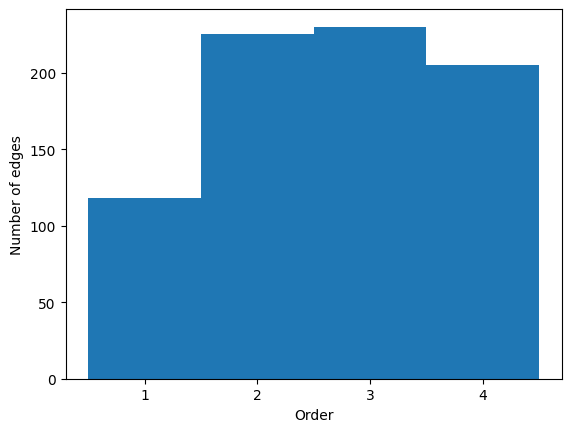

In [24]:
list_of_orders = H_new.edges.order.aslist()
plt.hist(
    list_of_orders,
    bins=range(min(list_of_orders), max(list_of_orders) + 2, 1),
    align="left",
)
plt.xticks(range(min(list_of_orders), max(list_of_orders) + 1, 1))
plt.xlabel("Order")
plt.ylabel("Number of edges");

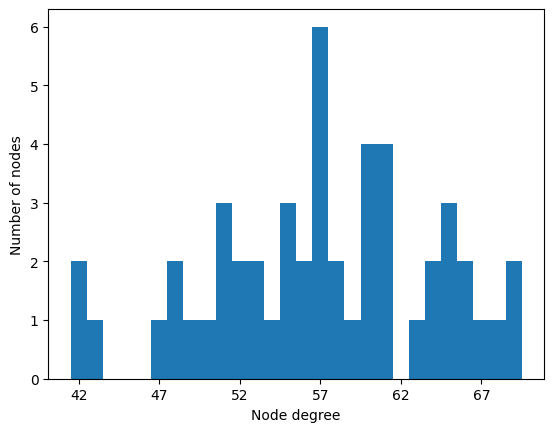

In [25]:
nodes_degrees_list = H_new.nodes.degree.aslist()
plt.hist(
    nodes_degrees_list,
    bins=range(min(nodes_degrees_list), max(nodes_degrees_list) + 1, 1),
    align="left",
)
plt.xticks(range(min(nodes_degrees_list), max(nodes_degrees_list) + 1, 5))
plt.xlabel("Node degree")
plt.ylabel("Number of nodes");

### Uploading a dataset

In [26]:
H_enron = xgi.load_xgi_data("email-enron")

In [27]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")

The hypergraph has 148 nodes and 10885 edges


In [28]:
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [29]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("The first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("The attributes of node '4' are")
print(H_enron.nodes["4"])
print("The attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']
The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}
The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


In [30]:
edges_dictionary = H_enron.edges.members(dtype=dict)
print(list(edges_dictionary.items())[:5])

[('0', {'4', '1'}), ('1', {'117', '1', '129'}), ('2', {'51', '1'}), ('3', {'51', '1'}), ('4', {'1', '41'})]


### Cleaning up a hypergraph dataset
You can check if your hypergraph is connected using the function:

In [31]:
xgi.is_connected(H_enron)

False

In [32]:
isolated_nodes = H_enron.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H_enron.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  5
Number of duplicated edges:  9371


In [33]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


In [34]:
len(H_enron.nodes) == len(H_enron_cleaned.nodes) + len(isolated_nodes)

True

In [35]:
len(H_enron.edges) == len(H_enron_cleaned.edges) + len(duplicated_edges)

False

In [36]:
xgi.is_connected(H_enron_cleaned)

True

### Drawing
Visualization is crucial for understanding complex data structures. You can use the default drawing function:

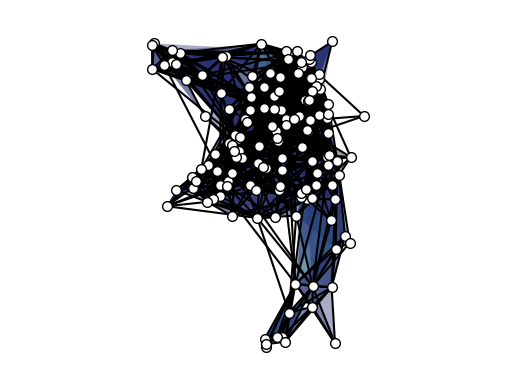

In [37]:
xgi.draw(H_enron_cleaned);

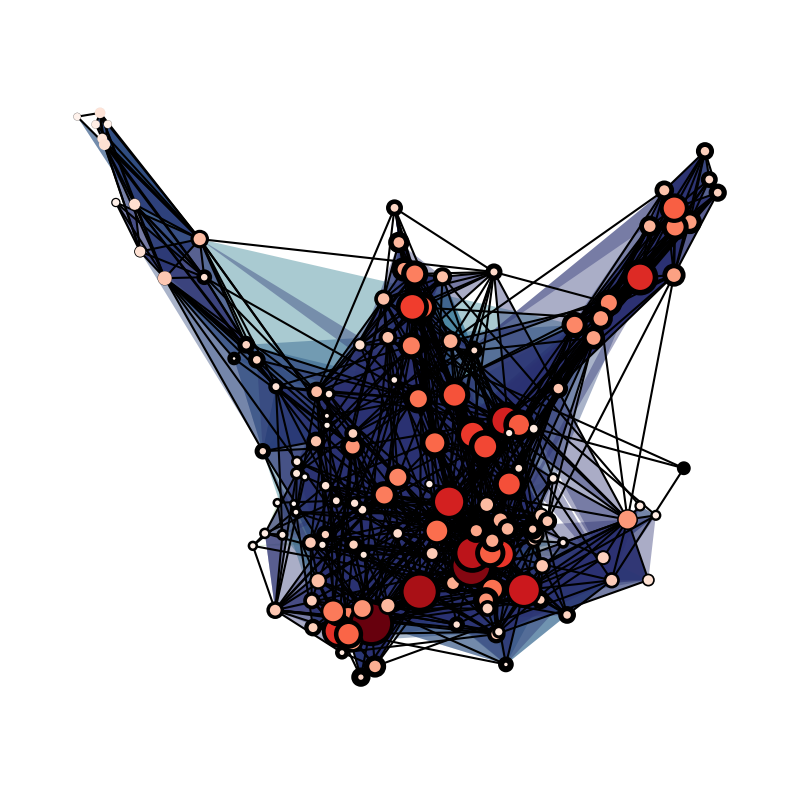

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
xgi.draw(
    H_enron_cleaned,
    node_size=H_enron_cleaned.nodes.degree,
    node_lw=H_enron_cleaned.nodes.average_neighbor_degree,
    node_fc=H_enron_cleaned.nodes.degree,
    ax=ax,
);

### Histograms of edges sizes and nodes’ degrees
It might me useful for a first analysis of you dataset to plot some histrograms representing relevant feautures of you higher-order structure. For example if you want to plot a histogram for the edges sizes:

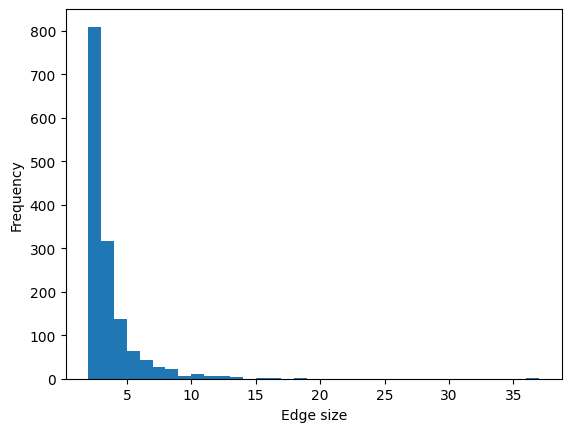

In [39]:
list_of_edges_sizes = H_enron_cleaned.edges.size.aslist()
ax = plt.subplot(111)
ax.hist(
    list_of_edges_sizes,
    bins=range(min(list_of_edges_sizes), max(list_of_edges_sizes) + 1, 1),
)
ax.set_xlabel("Edge size")
ax.set_ylabel("Frequency");

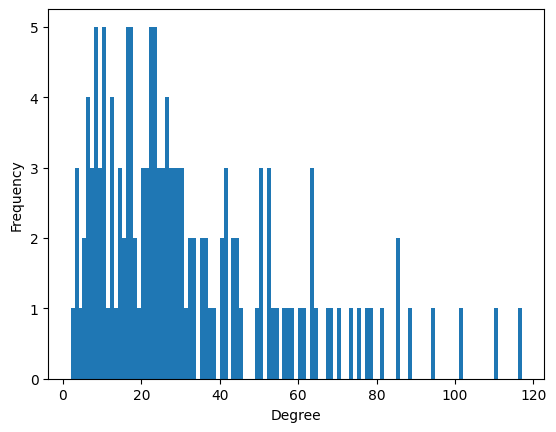

In [40]:
list_of_nodes_degrees = H_enron_cleaned.nodes.degree.aslist()
ax = plt.subplot(111)
ax.hist(
    list_of_nodes_degrees,
    bins=range(min(list_of_nodes_degrees), max(list_of_nodes_degrees) + 1, 1),
)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

### Incidence and Adjacency Matrices

In [41]:
I = xgi.incidence_matrix(H_enron_cleaned, sparse=False)

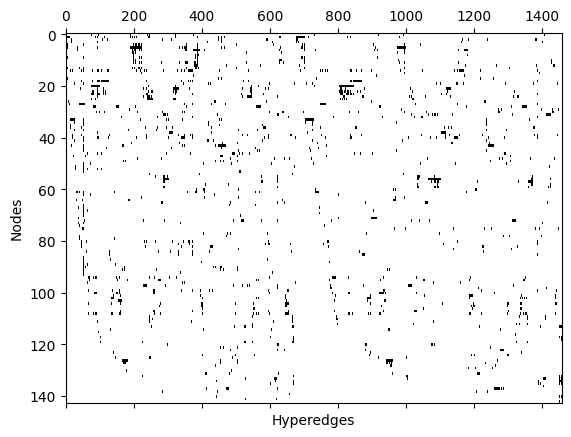

In [42]:
plt.spy(I, aspect="auto")
plt.xlabel("Hyperedges")
plt.ylabel("Nodes")
plt.show()

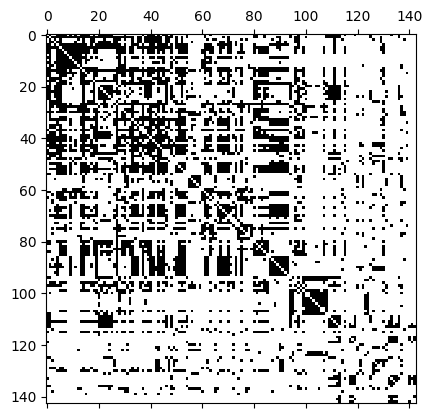

In [43]:
A = xgi.adjacency_matrix(H_enron_cleaned, sparse=False)
plt.spy(A);

### Algorithms

In [48]:
print("The density of the hypergraph is:", xgi.density(H_enron_cleaned))
print(
    "The assortativity of the hypergraph is:", xgi.degree_assortativity(H_enron_cleaned)
)

The density of the hypergraph is: 1.3084764540479412e-40
The assortativity of the hypergraph is: 0.2720636200689415


In [49]:
local_clustering_dict = xgi.local_clustering_coefficient(H_enron_cleaned)
print(local_clustering_dict)

{0: 0.6112820852842796, 1: 0.6339562501152698, 2: 0.5837947373260839, 3: 0.6270767577062006, 4: 0.6497241898978037, 5: 0.6883028005666035, 6: 0.7179414488945046, 7: 0.5888506735657011, 8: 0.4407894736842105, 9: 0.6371499962535367, 10: 0.5050316490232456, 11: 0.6948362161100078, 12: 0.5376442220598063, 13: 0.664016042014978, 14: 0.7624893307053918, 15: 0.497096150343852, 16: 0.5910577243910577, 17: 0.634900381721316, 18: 0.766068236413062, 19: 0.6477387500991035, 20: 0.6690373322537638, 21: 0.6939042793534276, 22: 0.7150213237411382, 23: 0.7253351022853525, 24: 0.5731174220962014, 25: 0.7200429707439118, 26: 0.6174282057811469, 27: 0.6241125385660331, 28: 0.4005992715737551, 29: 0.5194849584118213, 30: 0.526652998109372, 31: 0.5844262531858526, 32: 0.5939397597517252, 33: 0.6858414113751181, 34: 0.507683862031688, 35: 0.5562193576874984, 36: 0.7702243211334115, 37: 0.576778940186673, 38: 0.6533890357032772, 39: 0.7565836877802451, 40: 0.6918456352561674, 41: 0.5647748459257745, 42: 0.59

In [50]:
nodes_degree_2 = H_enron_cleaned.nodes.filterby("degree", 20)
print(nodes_degree_2)

[8, 58, 123]


In [51]:
df = H_enron_cleaned.nodes.multi(["degree", "clustering_coefficient"]).aspandas()
print(df)

     degree  clustering_coefficient
0        44                0.548792
1       101                0.452685
2        57                0.529268
3        36                0.606272
4        50                0.569712
..      ...                     ...
138       8                0.535714
139       6                0.333333
140       4                1.000000
141       6                1.000000
142       6                1.000000

[143 rows x 2 columns]
